# Data visualization with Seaborn

<img src="https://github.com/dfbarrero/dataCourse/raw/master/dataviz/figs/seaborn.png" width="300">


## Introduction

Seaborn is a modern data-visualization Python package:

- Based on Matplotlib ... and it uses Matplotlib behind the scene.
- Pandas-aware.
- Highlevel.
- Advancedvisualizations.
- Easy to use.
    
Seaborn website contains the [reference documentation](https://seaborn.pydata.org/api.html) along with many [examples](https://seaborn.pydata.org/examples/index.html).
    
Still under development! API is changing. Notebook tested with Seaborn v0.11

In [1]:
# Disable warnings

#import warnings
#warnings.filterwarnings('ignore')

## Initial setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)

0.11.2


Graphical device must by initialized to avoid unexpected behavior. Two modes:
- inline: static
- notebook: interactive, only for browser-based devices. **Not supported by Colab**.

<IPython.core.display.Javascript object>


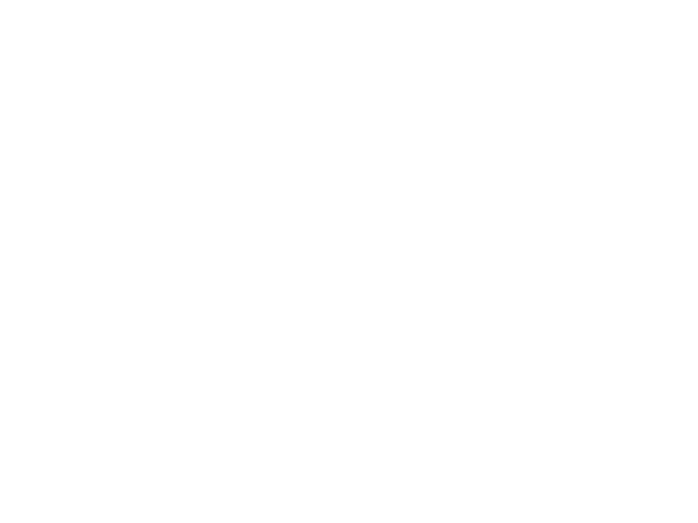

In [3]:
%matplotlib notebook

sns.histplot(np.random.lognormal(10, 1, 100));

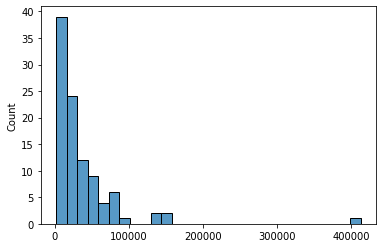

In [4]:
%matplotlib inline

sns.histplot(np.random.lognormal(10, 1, 100));

## Seaborn typical usage

1. Prepare data
2. Set up aesthetics
3. Plot
4. Customize the plot

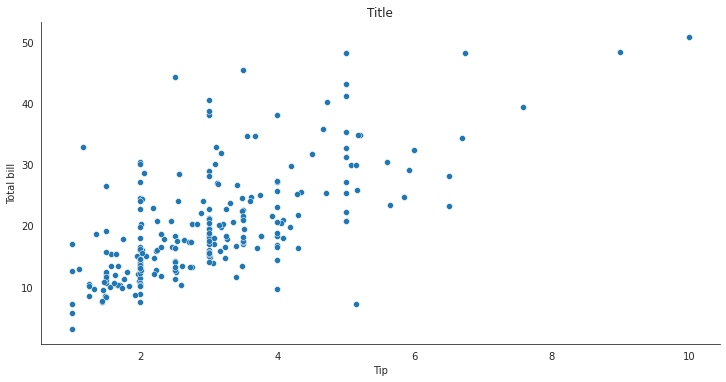

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

# Prepare data
tips = sns.load_dataset("tips")

# Set up aesthetics 
sns.set_style("white")

# Plot
g = sns.relplot(x="tip", y="total_bill", data=tips, aspect=2) 

# Plot customization
plt.title("Title")
g.set_axis_labels('Tip', 'Total bill');

# Datasets

Seaborn comes with several datasets.

List of available datasets [here](https://github.com/mwaskom/seaborn-data).

We will use three datasets.

## Iris dataset

In [6]:
iris = sns.load_dataset('iris')
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Tips dataset

In [3]:
tips = sns.load_dataset('tips')
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Titanic dataset

In [8]:
titanic = sns.load_dataset('titanic')
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exoplanets dataset

In [9]:
planets = sns.load_dataset('planets')
display(planets.head())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
sns.set_style("white") # Let's leave this theme

# Plot parameters

All Seaborn plots use the same parameters, with a similar expected behaviour, which makes Seaborn quite straitforward to use.

- *x*: Data axis x
- *y*: Data axis Y
- *data*: Dataframe name
- *hue*: Color
- *style*: Style
- *sizes*: Size
- *col*: Column (not available in all functions)
- *row*: Row (not available in all functions)
- *kind*: Alternate representation (not available in all functions)

Many plots have specific parameters shared within the module.

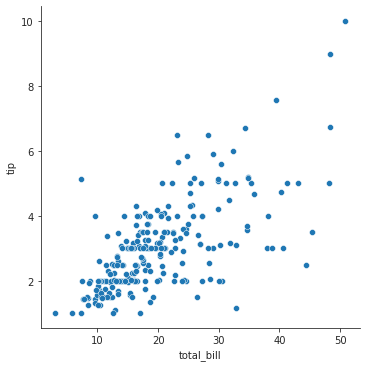

In [85]:
sns.relplot(x="total_bill", y="tip", data=tips);

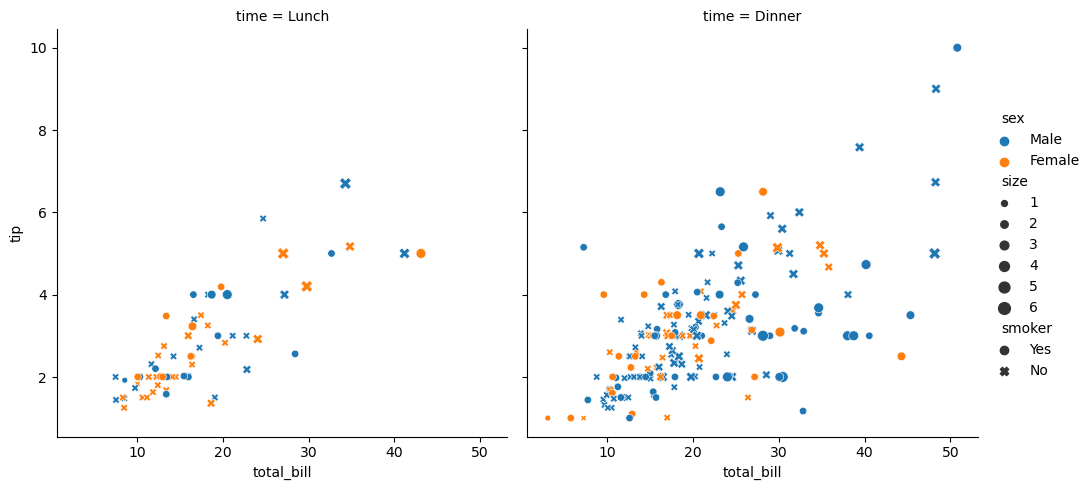

In [4]:
sns.relplot(x="total_bill", y="tip", col="time", hue="sex", style="smoker", size="size", data=tips);

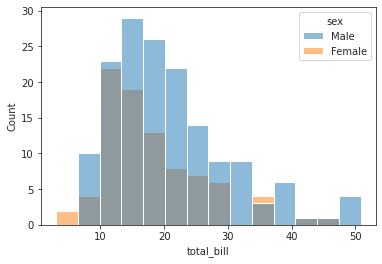

In [87]:
sns.histplot(x="total_bill", hue="sex", data=tips);

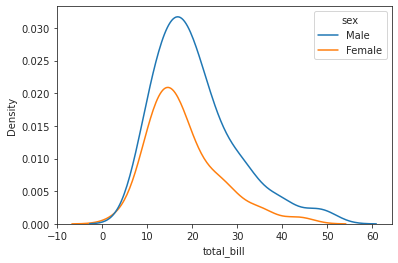

In [88]:
sns.kdeplot(x="total_bill", hue="sex", data=tips);

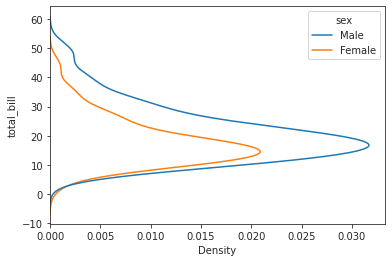

In [89]:
sns.kdeplot(y="total_bill", hue="sex", data=tips);

## Seaborn modules

*kdeplot()* and *histplot()* belong to the same module, so the share some arguments, such as *multiple*.

<img src="https://github.com/dfbarrero/dataCourse/raw/master/dataviz/figs/sns-modules.png" width="500">

High-level and low-level plots.

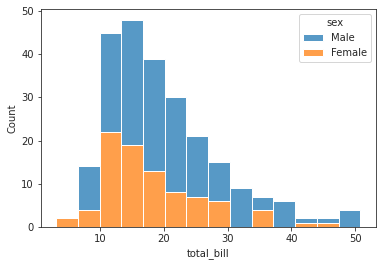

In [90]:
sns.histplot(x="total_bill", hue="sex", multiple="stack", data=tips);

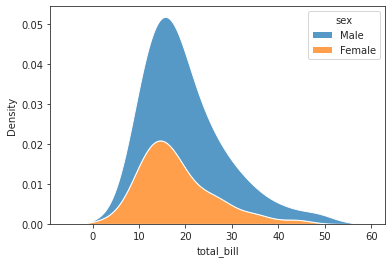

In [91]:
sns.kdeplot(x="total_bill", hue="sex", multiple="stack", data=tips);

# Univariable plots - distribution of data

More detailed information in ["Visualizing distributions of data"](https://seaborn.pydata.org/tutorial/distributions.html).

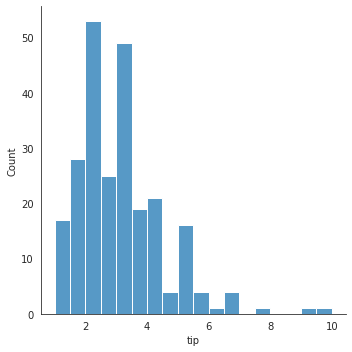

In [16]:
sns.displot(x="tip", data=tips);

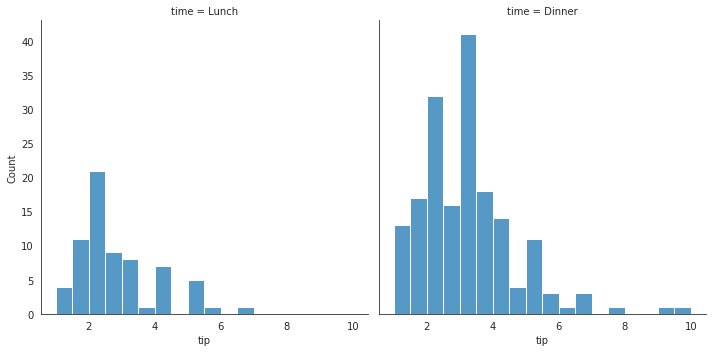

In [17]:
sns.displot(x="tip", col="time", data=tips);

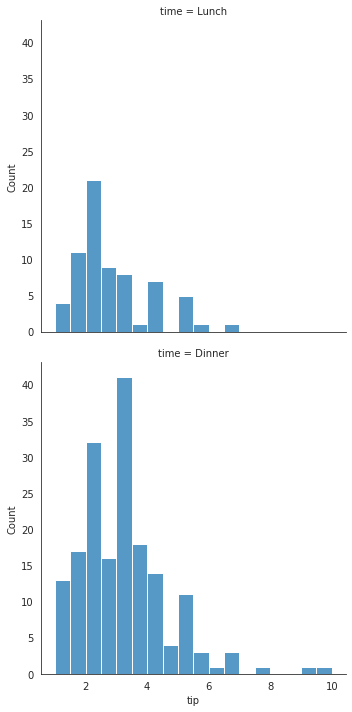

In [18]:
sns.displot(x="tip", row="time", data=tips);

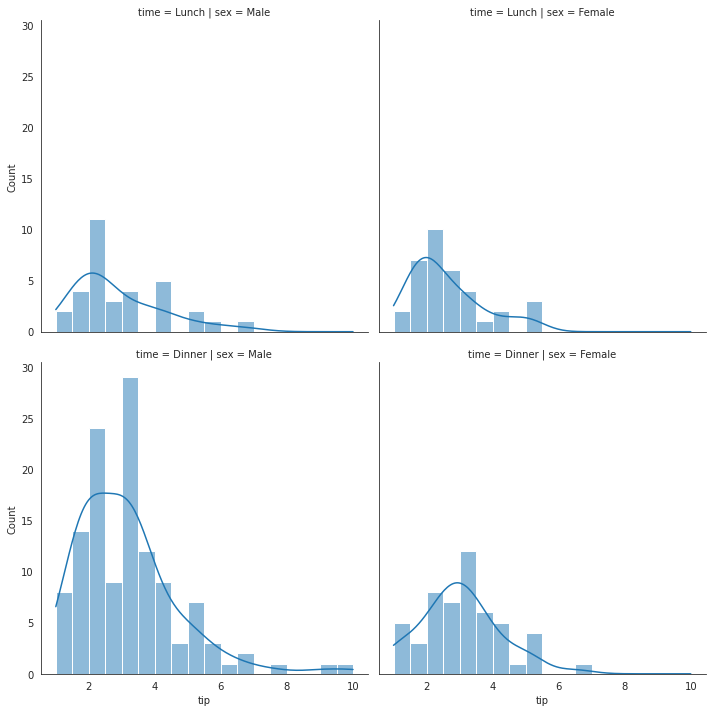

In [19]:
sns.displot(x="tip", col="sex", row="time", kde=True, data=tips);

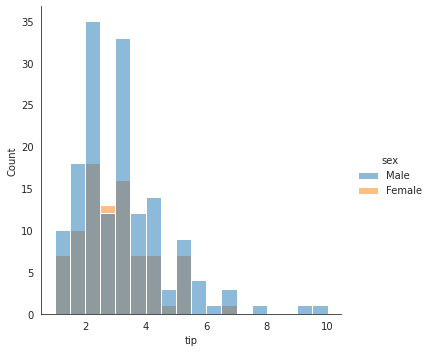

In [20]:
sns.displot(x="tip", hue="sex", data=tips);

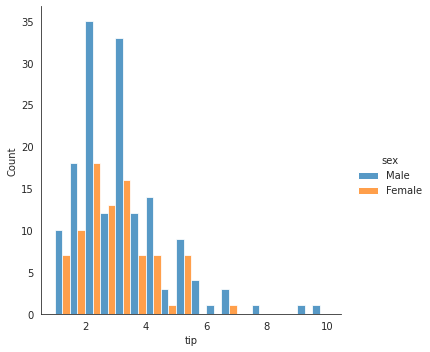

In [21]:
sns.displot(x="tip", hue="sex", data=tips, multiple="dodge");

More about *displot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.displot.html).

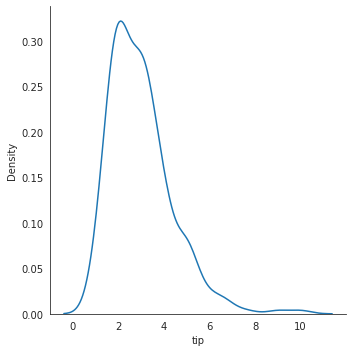

In [22]:
sns.displot(x="tip", data=tips, kind="kde");

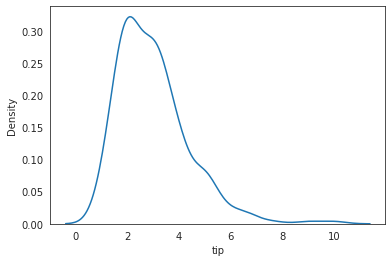

In [23]:
sns.kdeplot(x="tip", data=tips);

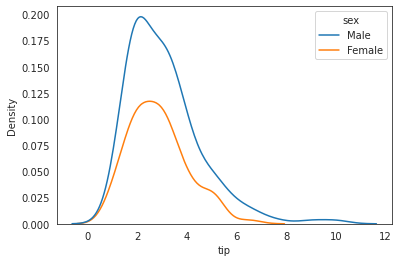

In [24]:
sns.kdeplot(x="tip", hue="sex", data=tips);

In [25]:
## sns.kdeplot(x="tip", col="sex", data=tips); # Raises an error

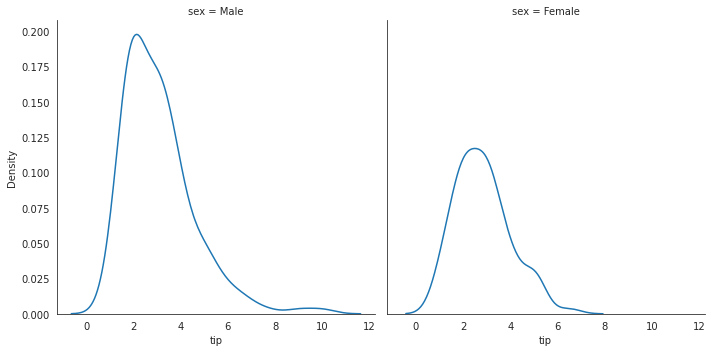

In [26]:
sns.displot(x="tip", col="sex", kind="kde", data=tips); # Raises an error

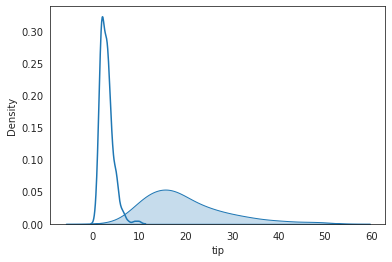

In [27]:
sns.kdeplot(x="tip", data=tips);
sns.kdeplot(x="total_bill", data=tips, shade=True);

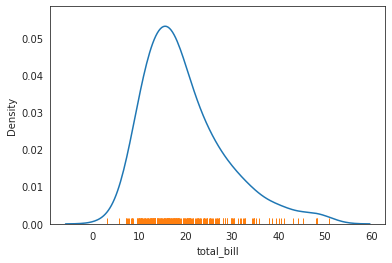

In [28]:
sns.kdeplot(x="total_bill", data=tips);
sns.rugplot(x="total_bill", data=tips);

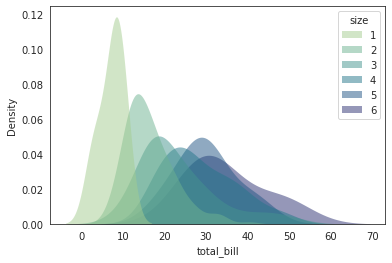

In [29]:
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

More about *kdeplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

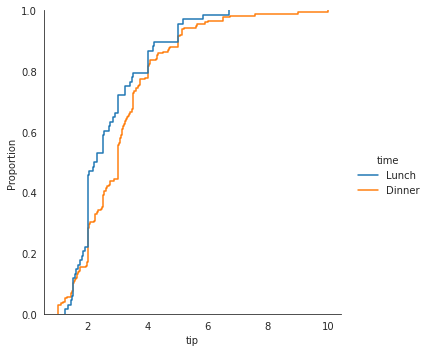

In [30]:
sns.displot(x="tip", hue="time", kind="ecdf", data=tips);

# Bidimensional plots - visualizing statistical relationships

More detailed information in ["Visualizing statistical relationships"](https://seaborn.pydata.org/tutorial/relational.html).

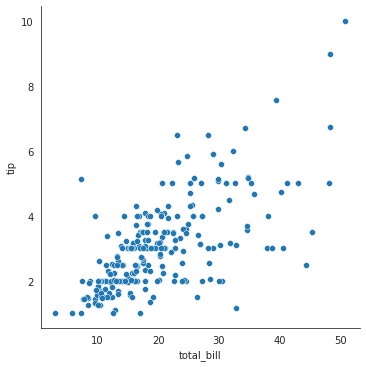

In [31]:
sns.relplot(x="total_bill", y="tip", data=tips);

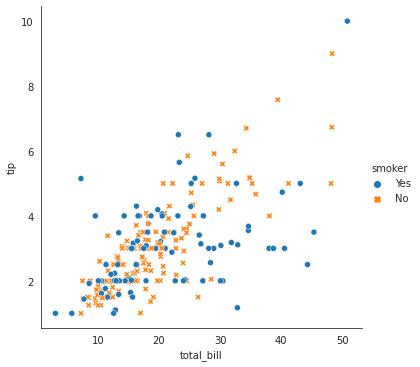

In [32]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

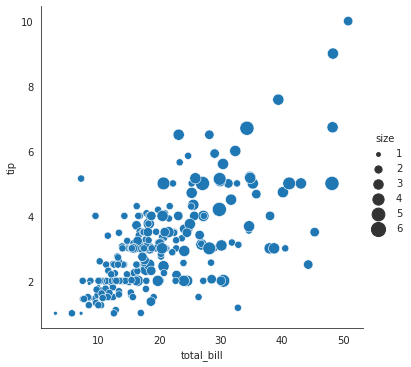

In [33]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

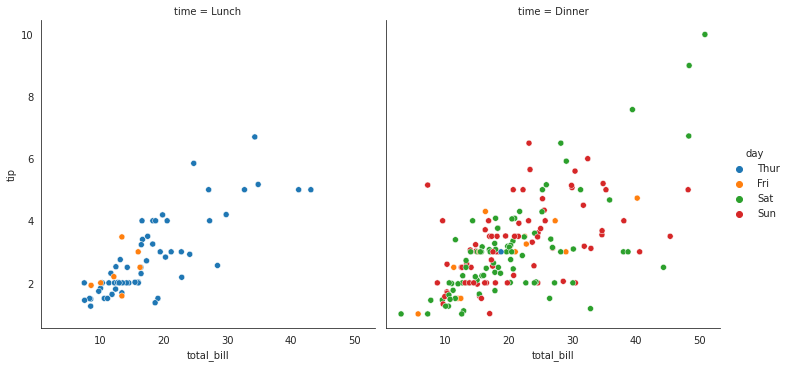

In [34]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips);

More about *relplot()* in the [reference documentation]().

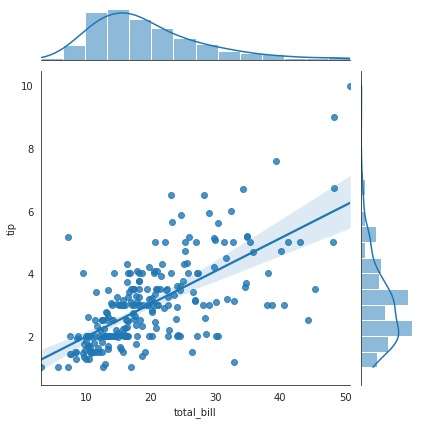

In [35]:
sns.jointplot(x="total_bill", y="tip", kind="reg", data=tips);

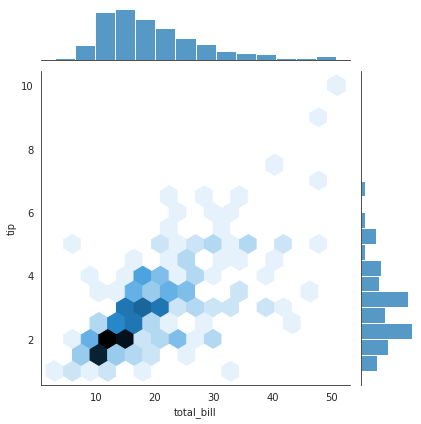

In [36]:
sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips);

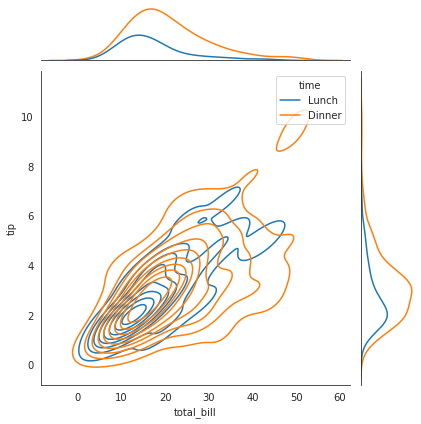

In [37]:
sns.jointplot(x="total_bill", y="tip", kind="kde", hue="time", data=tips);

More about *jointplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

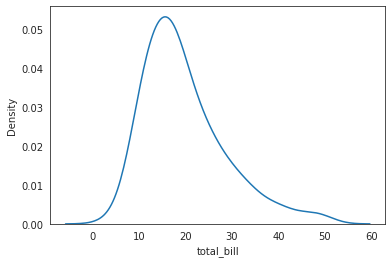

In [38]:
sns.kdeplot(x="total_bill", data=tips);

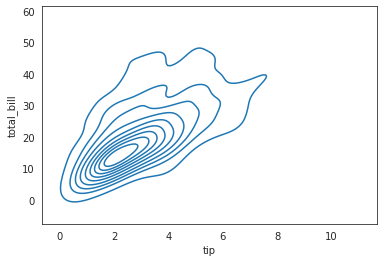

In [39]:
sns.kdeplot(x='tip', y='total_bill', data=tips);

More about *kdeplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

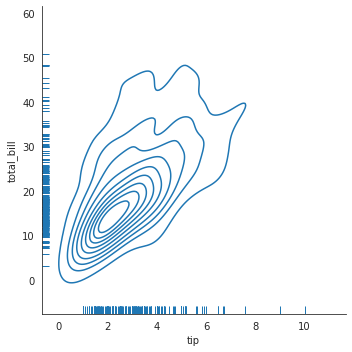

In [40]:
sns.displot(x='tip', y='total_bill', kind="kde", rug=True, data=tips);

# Multivariable plots

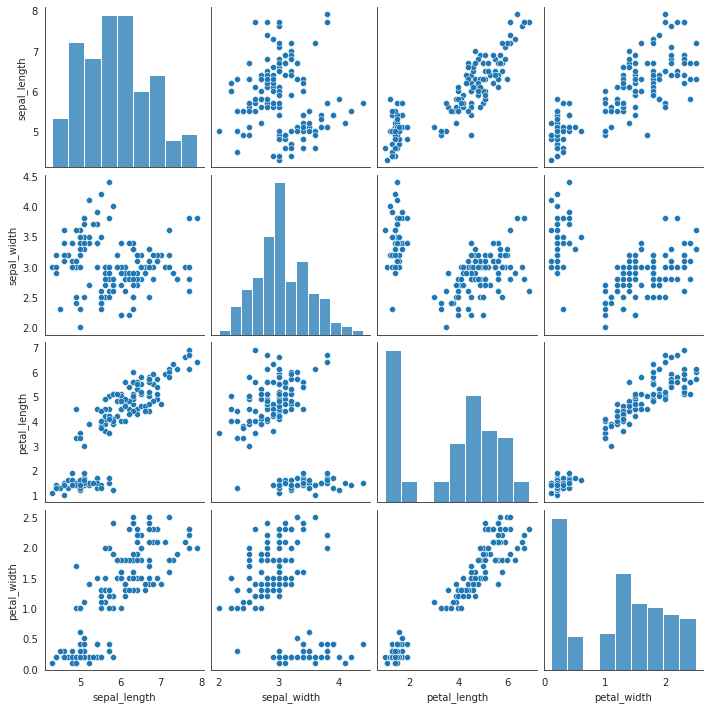

In [41]:
sns.pairplot(data=iris);

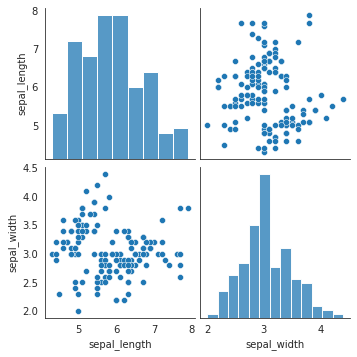

In [42]:
sns.pairplot(data=iris , vars=["sepal_length", "sepal_width"]);

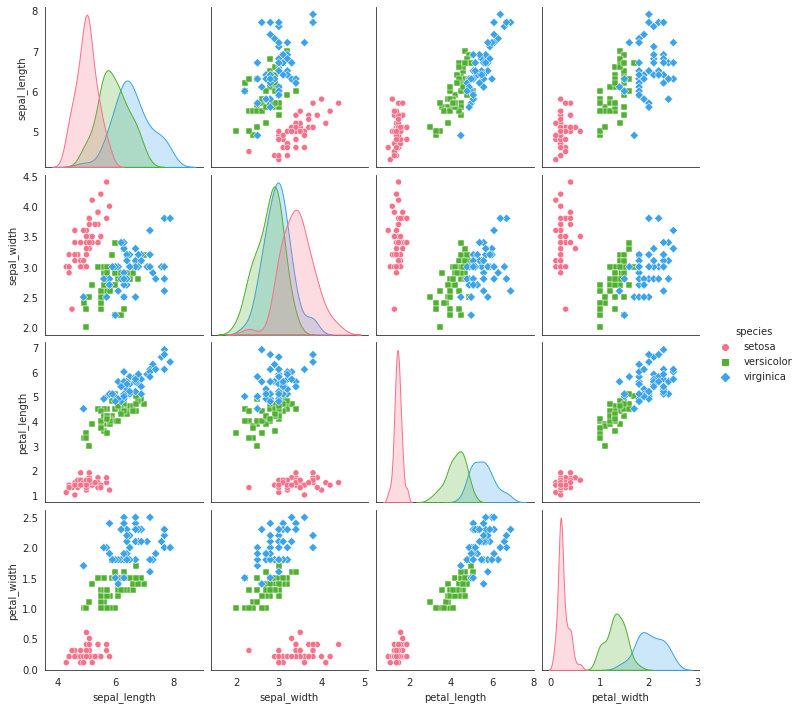

In [43]:
sns.pairplot(data=iris, hue="species", palette="husl", markers=["o", "s", "D"], diag_kind='kde');

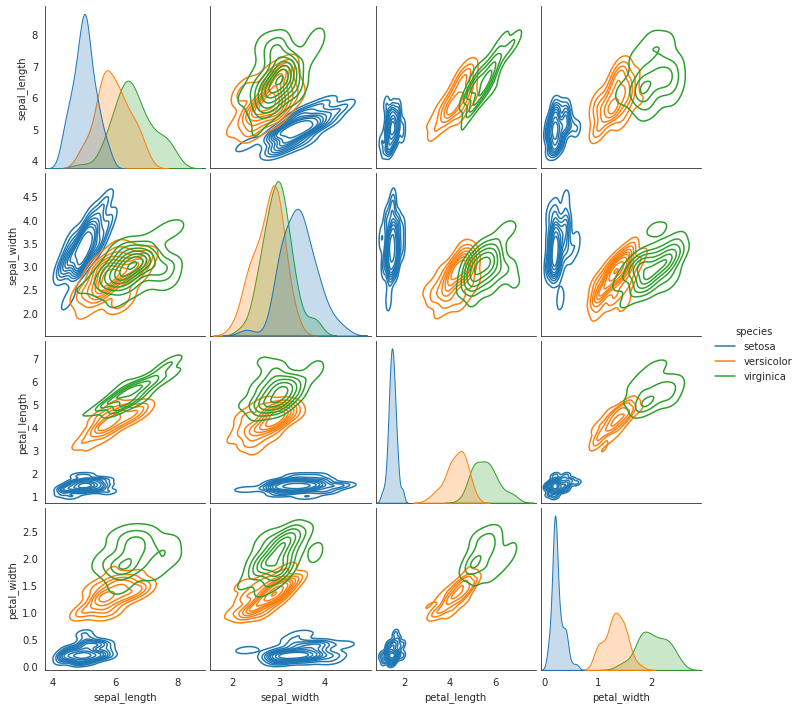

In [44]:
sns.pairplot(iris, hue="species", kind="kde");

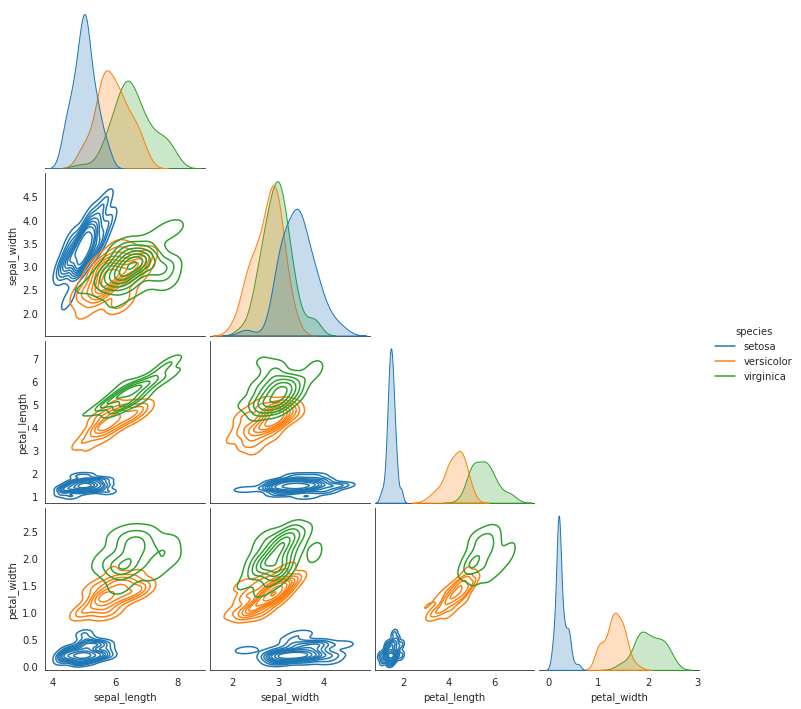

In [45]:
sns.pairplot(iris, hue="species", kind="kde", corner=True);

More about *pairplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

# Plotting categorical attributes

More detailed information in ["Visualizing categorical data"](https://seaborn.pydata.org/tutorial/categorical.html).

* Categorical scatterplots:

    - *stripplot()* (with kind="strip"; the default)
    - *swarmplot()* (with kind="swarm")

* Categorical distribution plots:

    - *boxplot()* (with kind="box")
    - *violinplot()* (with kind="violin")
    - *boxenplot()* (with kind="boxen")

* Categorical estimate plots:

    - *pointplot()* (with kind="point")
    - *barplot()* (with kind="bar")
    - *countplot()* (with kind="count")

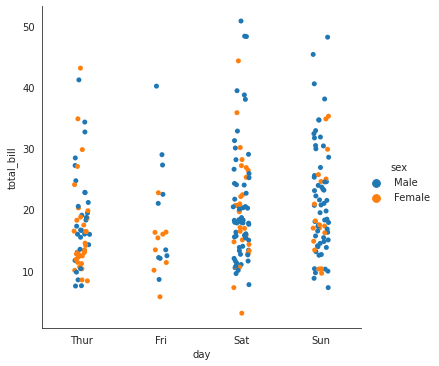

In [46]:
sns.catplot(x="day", y="total_bill", hue="sex", data=tips);

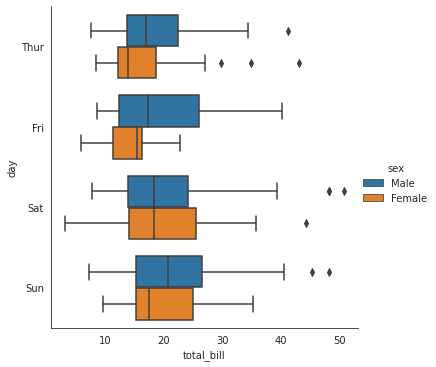

In [47]:
sns.catplot(y="day", x="total_bill", hue="sex", data=tips , kind="box");

More about *catplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html).

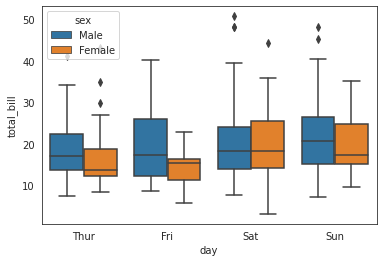

In [48]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

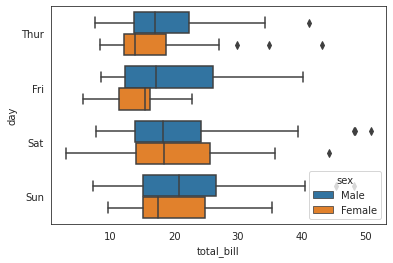

In [49]:
sns.boxplot(y="day", x="total_bill", hue="sex", data=tips);

More about *boxplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

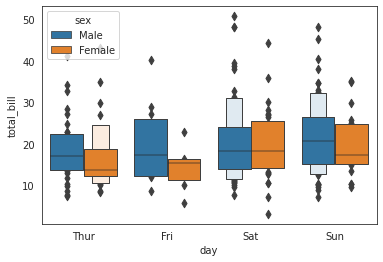

In [50]:
sns.boxenplot(x="day", y="total_bill", hue="sex", data=tips);

More about *boxenplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.boxenplot.html).

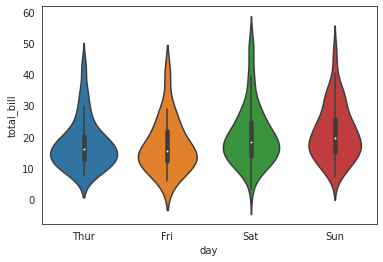

In [51]:
sns.violinplot(x="day", y="total_bill", data=tips);

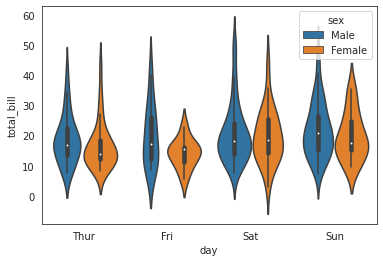

In [52]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips);

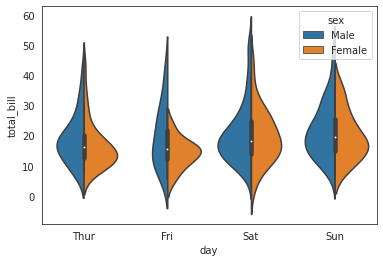

In [53]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips , split=True);

<img src="https://www.explainxkcd.com/wiki/images/c/cb/violin_plots.png" width="300">

More about *violinplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

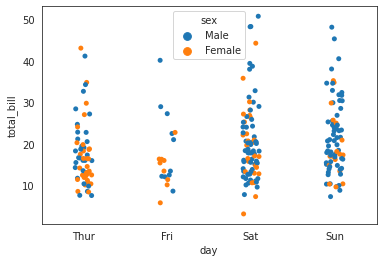

In [54]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips);

More about *stripplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html).

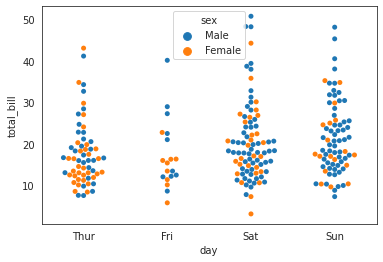

In [55]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

More about *swarmplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).

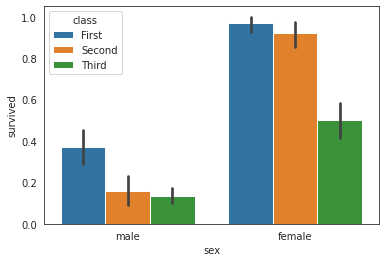

In [56]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

More about *barplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html).

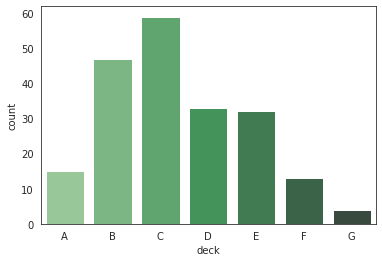

In [57]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

More about *countplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html).

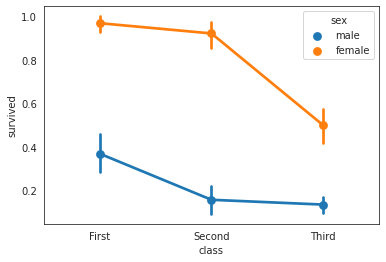

In [58]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic);

More about *pointplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

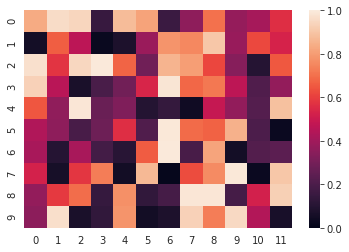

In [59]:
 sns.heatmap(np.random.rand(10, 12), vmin=0, vmax=1);

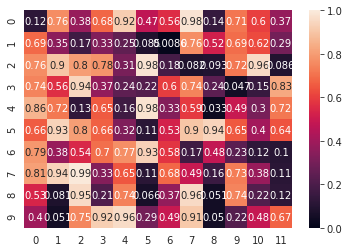

In [60]:
 sns.heatmap(np.random.rand(10, 12), vmin=0, vmax=1, annot=True);

*heatmap()* is quite popular to visualize correlations among attributes in a Pandas dataframe.

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


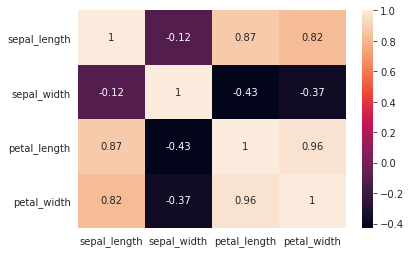

In [61]:
cor = iris.corr()

print(cor)

sns.heatmap(cor, annot=True);

More about *heatmap()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

## Linear regressions

More detailed information about regressions in [Estimating regression fits](https://seaborn.pydata.org/tutorial/regression.html).

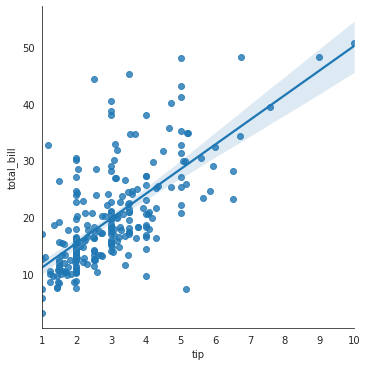

In [62]:
sns.lmplot(x="tip", y="total_bill", data=tips);

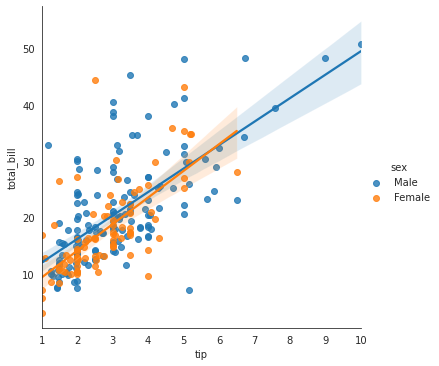

In [63]:
sns.lmplot(x="tip", y="total_bill", hue="sex", data=tips);

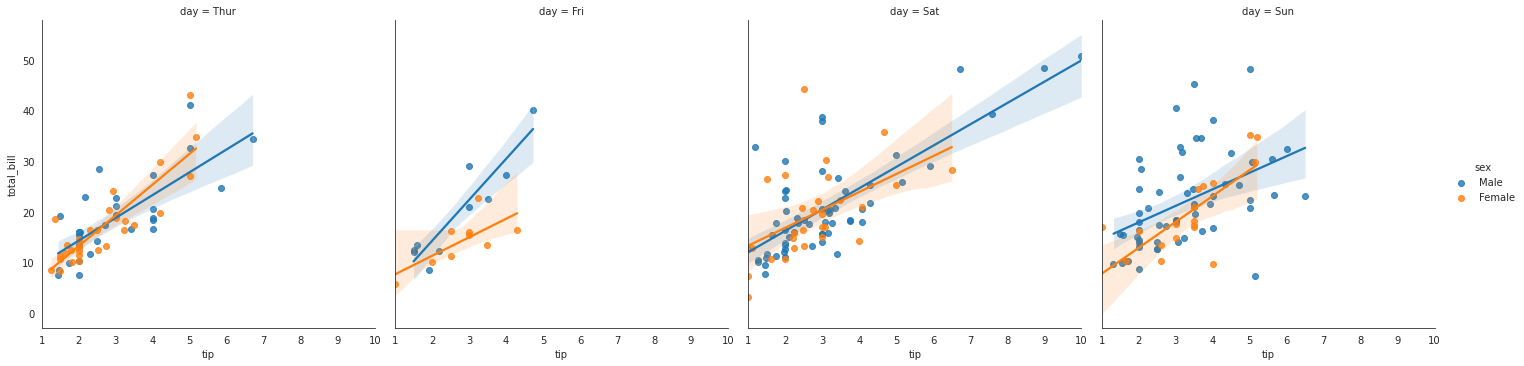

In [64]:
sns.lmplot(x="tip", y="total_bill", hue="sex", col="day", data=tips);

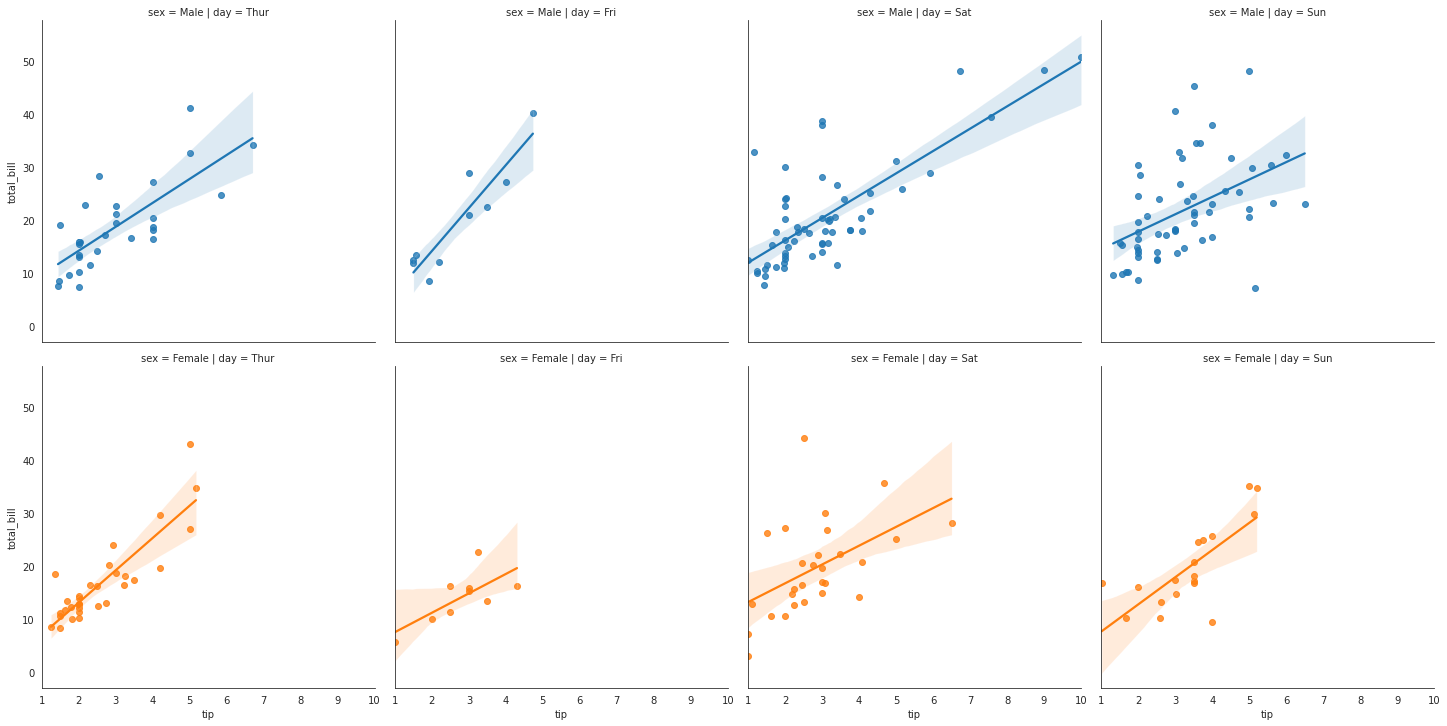

In [65]:
sns.lmplot(x="tip", y="total_bill", hue="sex", col="day", row="sex", data=tips);

More about *lmplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

## Plotting continous data

In [66]:
fmri = sns.load_dataset("fmri") 
display(fmri.head())

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


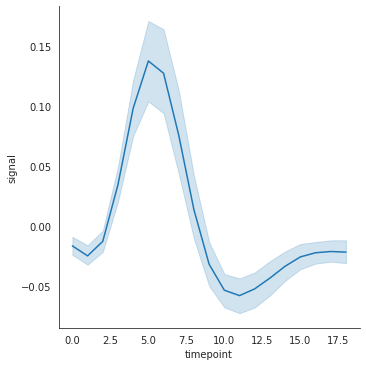

In [67]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

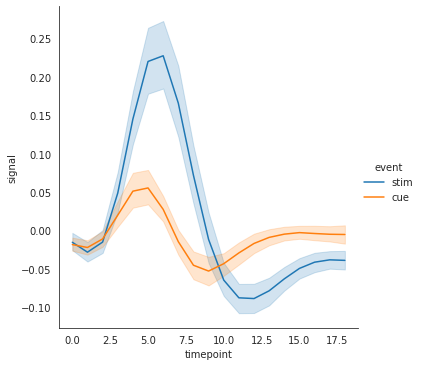

In [68]:
sns.relplot(x="timepoint", y="signal", kind="line", hue="event", data=fmri);

More about *lmplot()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

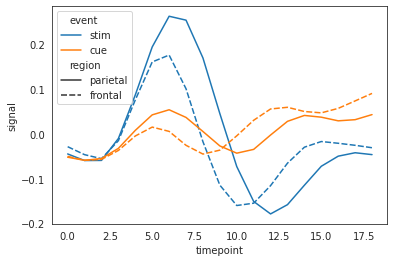

In [69]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="region", data=fmri.query("subject=='s11'"));

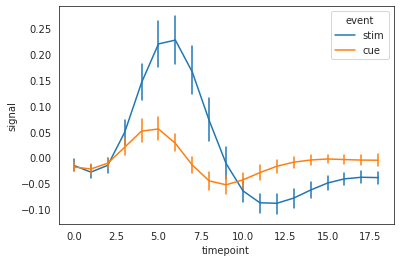

In [70]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri, err_style="bars");

# Multi-plot grids

Detailed information in [Figure-level vs axis-level functions](https://seaborn.pydata.org/tutorial/function_overview.html).

### High level functions: displot, displot and catplot

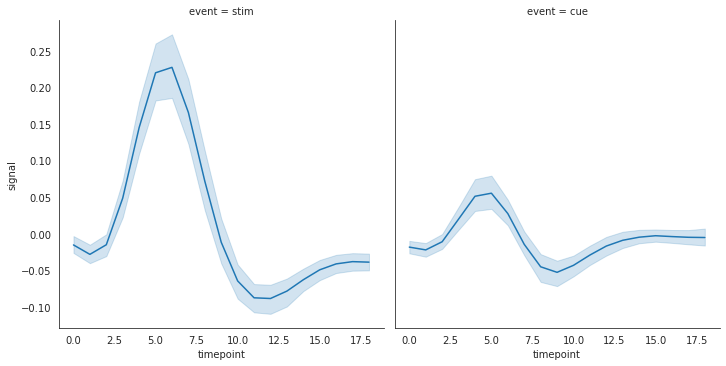

In [71]:
sns.relplot(x="timepoint", y="signal", kind="line", col="event", data=fmri);

### Low level functions

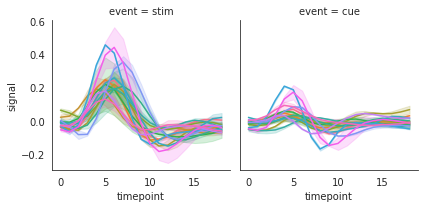

In [72]:
g = sns.FacetGrid(fmri, col="event", hue="subject")
g.map(sns.lineplot, "timepoint", "signal");

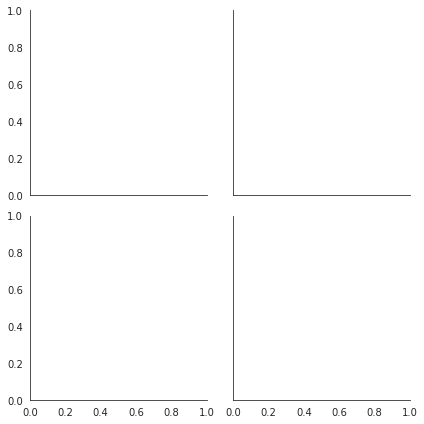

In [73]:
g = sns.FacetGrid(tips, col="time", row="sex")

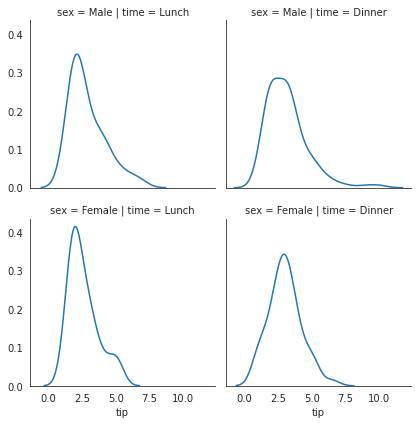

In [74]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.kdeplot, "tip");

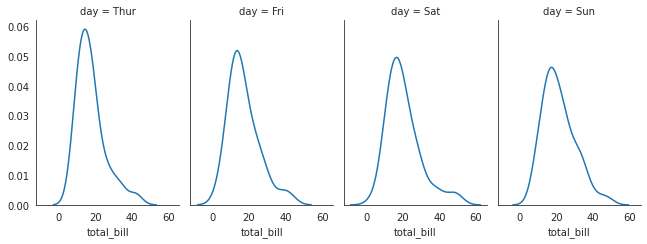

In [75]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)
g.map(sns.kdeplot, "total_bill");

More about *FacetGrid()* in the [reference documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

# Customizations

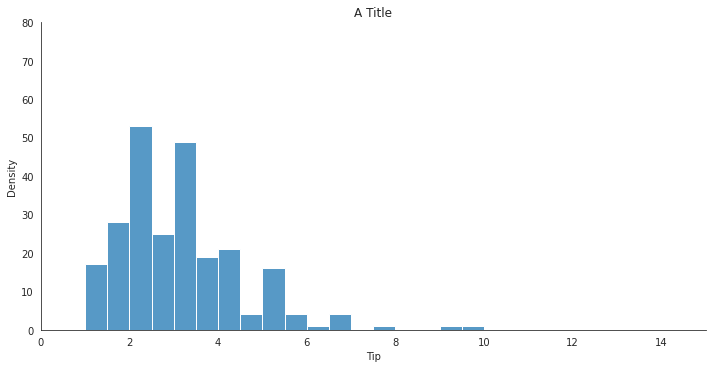

In [76]:
sns.displot(tips['tip'], aspect=2)
plt.title("A Title")
plt.ylabel("Density")
plt.xlabel("Tip")
plt.xlim(0, 15)
plt.ylim(0, 80);

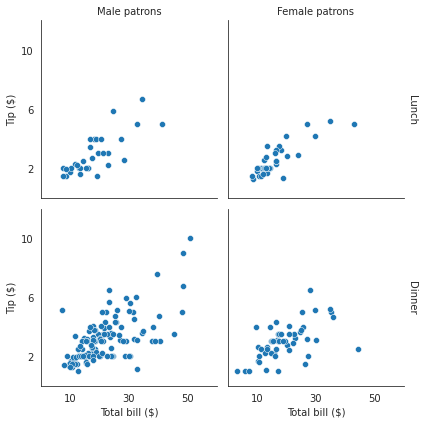

In [77]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()

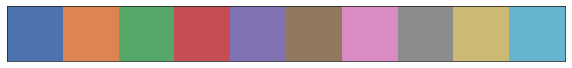

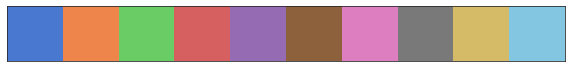

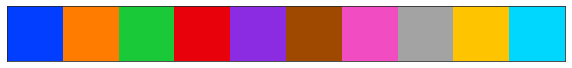

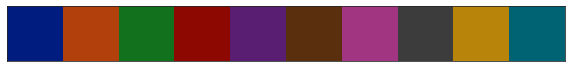

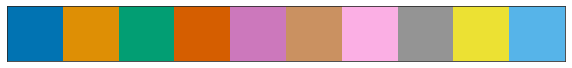

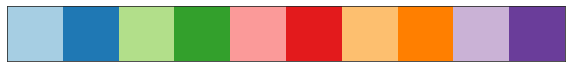

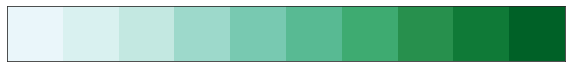

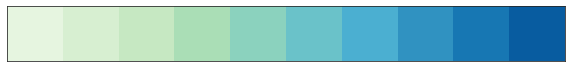

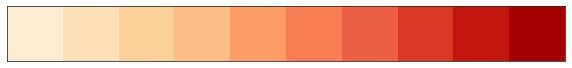

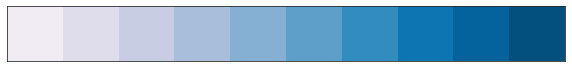

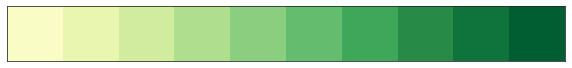

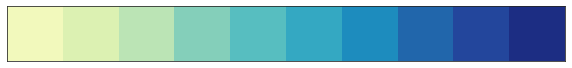

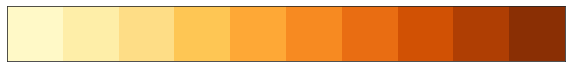

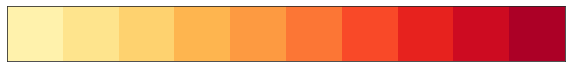

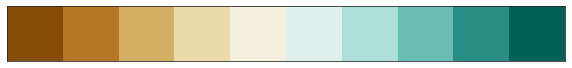

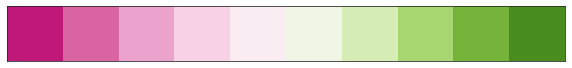

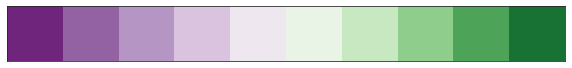

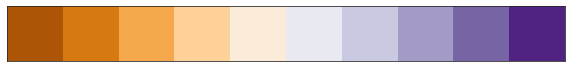

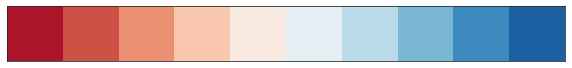

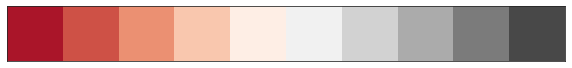

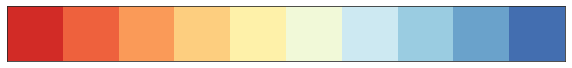

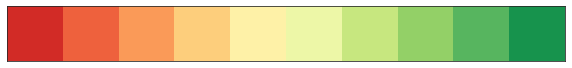

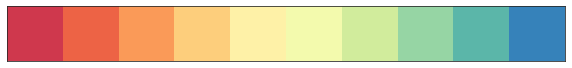

In [78]:
plt.rcParams.update({'figure.max_open_warning': 0}) # Avoid warning, not relevant

sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("muted", 10))
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))
sns.palplot(sns.color_palette("colorblind", 10))
sns.palplot(sns.color_palette("Paired", 10))
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("GnBu", 10))
sns.palplot(sns.color_palette("OrRd", 10))
sns.palplot(sns.color_palette("PuBu", 10))
sns.palplot(sns.color_palette("YlGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
sns.palplot(sns.color_palette("YlOrBr", 10))
sns.palplot(sns.color_palette("YlOrRd", 10))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("PiYG", 10))
sns.palplot(sns.color_palette("PRGn", 10))
sns.palplot(sns.color_palette("PuOr", 10))
sns.palplot(sns.color_palette("RdBu", 10))
sns.palplot(sns.color_palette("RdGy", 10))
sns.palplot(sns.color_palette("RdYlBu", 10))
sns.palplot(sns.color_palette("RdYlGn", 10))
sns.palplot(sns.color_palette("Spectral", 10))

In [79]:
#sns.set_palette("husl", 3)
#sns.displot(tips['tip']);

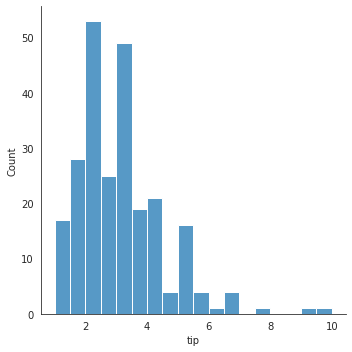

In [80]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
# sns.set_palette(flatui) # This would affect the default palette applied to all plots
sns.displot(tips['tip'], palette=flatui);

# Seaborn aestethics

Detailed information in [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

Available styles: white, dark, whitegrid, darkgrid and ticks.

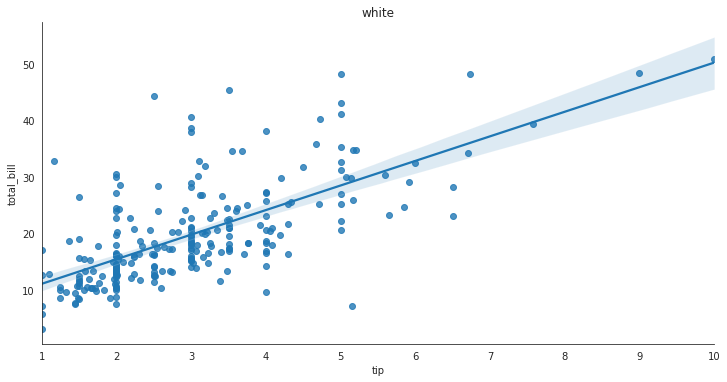

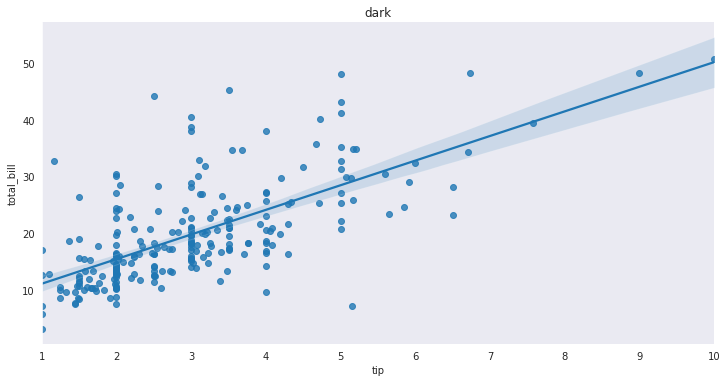

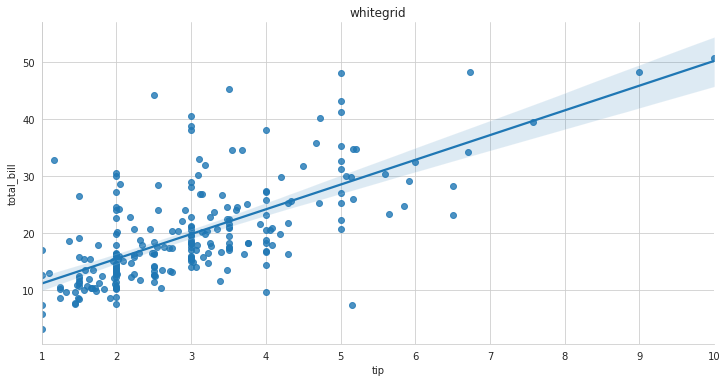

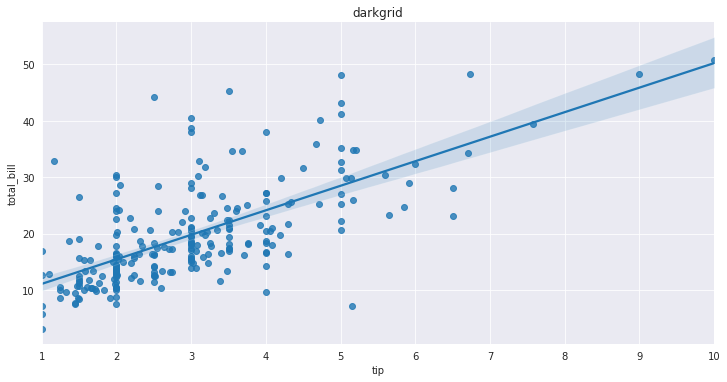

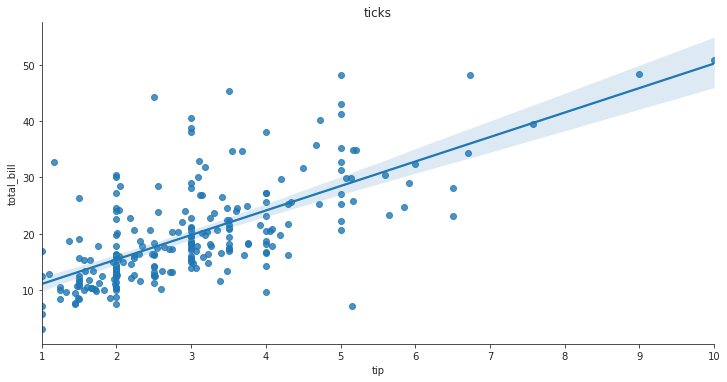

In [81]:
for theme in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(theme)
    sns.lmplot(x="tip",y="total_bill", data=tips, aspect=2)
    plt.title(theme)

# Final remarks

In [82]:
#plt.show() # Show pic in script and event loop

In [83]:
plt.savefig("mypic.png") # Save plot
plt.savefig("mypic.png", transparent=True) # Save plot

<Figure size 432x288 with 0 Axes>

If you are using Google Colab, you may want to download the file.

In [ ]:
from google.colab import files

files.download('mypic.png')

Supported file formats:

In [84]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

<Figure size 432x288 with 0 Axes>

Bonus track for LaTeX nerds: *matplotlib2tikz*.